In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import os
from matplotlib import pyplot as plt

## (Optional) Prepare a smaller dataset for your experiment

* python example: `tutorials/subsamples.py`
* api: `utils.data.subsampling`

In [2]:
from utils.data import subsampling
from utils.file import load_from_json

# load the configurations for the experiment
data_configs = load_from_json("../src/configs/demo/data-mnist.json")
output_root = "../task1_gen"
# print(data_configs.get('bs_file'))


# load the full-sized benign samples
file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
# print('getcwd:      ', os.getcwd())

# print(file)
# print(dir(file))
# print(data_configs.get('dir'))
# print(data_configs.get('label_file'))
X_bs = np.load(file)

# load the corresponding true labels
file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
print(file)
labels = np.load(file)

# get random subsamples
# for MNIST, num_classes is 10
# files "subsamples-mnist-ratio_0.1-xxxxxx.npy" and "sublabels-mnist-ratio_0.1-xxxxxx.npy"
# will be generated and saved at "/results" folder, where "xxxxxx" are timestamps.
subsamples, sublabels = subsampling(data=X_bs,
                                    labels=labels,
                                    num_classes=10,
                                    filepath=output_root,
                                    filename='mnist')

Using TensorFlow backend.
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\t

../data/test_Label-mnist-clean.npy


## Update the json file accordingly

1. Copy and paste the generated subsamples to the right place (i.e., defined by `"dir"` in `data-mnist.json`).
2. In the `data-mnist.json`, replace the value of `"bs_file"` with the `"subsamples-mnist-ratio_0.1-xxxxxx.npy"` and the value of `"label_file"` with the `"sublabels-mnist-ratio_0.1-xxxxxx.npy"`.

# Generate adversarial examples
We use `FGSM` as the example.
* python example: `tutorials/craft_adversarial_examples.py`
* main api: `attacks.attack.generate`
* check tunable parameters for each attack in file `attacks/attack.py`.

In [3]:
# copied from tutorials/craft_adversarial_examples.py
def generate_ae(model, data, labels, attack_configs, save=False, output_dir=None):
    """
    Generate adversarial examples
    :param model: WeakDefense. The targeted model.
    :param data: array. The benign samples to generate adversarial for.
    :param labels: array or list. The true labels.
    :param attack_configs: dictionary. Attacks and corresponding settings.
    :param save: boolean. True, if save the adversarial examples.
    :param output_dir: str or path. Location to save the adversarial examples.
        It cannot be None when save is True.
    :return:
    """
    img_rows, img_cols = data.shape[1], data.shape[2]
    num_attacks = attack_configs.get("num_attacks")
    data_loader = (data, labels)

    if len(labels.shape) > 1:
        labels = np.asarray([np.argmax(p) for p in labels])

    # generate attacks one by one
    for id in range(num_attacks):
        key = "configs{}".format(id)
        data_adv = generate(model=model,
                            data_loader=data_loader,
                            attack_args=attack_configs.get(key)
                            )
        # predict the adversarial examples
        predictions = model.predict(data_adv)
        predictions = np.asarray([np.argmax(p) for p in predictions])

        err = error_rate(y_pred=predictions, y_true=labels)
        print(">>> error rate:", err)

        # plotting some examples
        num_plotting = min(data.shape[0], 2)
        for i in range(num_plotting):
            img = data_adv[i].reshape((img_rows, img_cols))
            plt.imshow(img, cmap='gray')
            title = '{}: {}->{}'.format(attack_configs.get(key).get("description"),
                                        labels[i],
                                        predictions[i]
                                        )
            plt.title(title)
            plt.show()
            plt.close()

        # save the adversarial example
        if save:
            if output_dir is None:
                raise ValueError("Cannot save images to a none path.")
            # save with a random name
            file = os.path.join(output_dir, "{}.npy".format(attack_configs.get(key).get("description")))
#             file = os.path.join(output_dir, "{}.npy".format(time.monotonic()))
            print("Save the adversarial examples to file [{}].".format(file))
            np.save(file, data_adv)

>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> Generating FGSM_eps0.08_task1(EOT:OFF) examples.
>>> error rate: 0.178


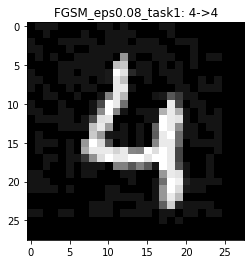

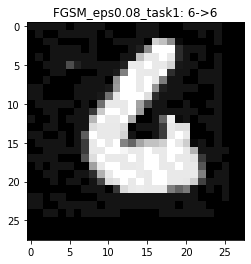

Save the adversarial examples to file [../task1_gen\FGSM_eps0.08_task1.npy].
>>> Generating FGSM_eps0.15_task1(EOT:OFF) examples.
>>> error rate: 0.512


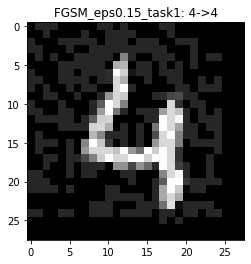

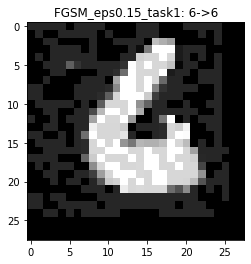

Save the adversarial examples to file [../task1_gen\FGSM_eps0.15_task1.npy].
>>> Generating FGSM_eps0.20_task1(EOT:OFF) examples.
>>> error rate: 0.73


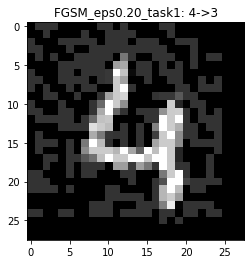

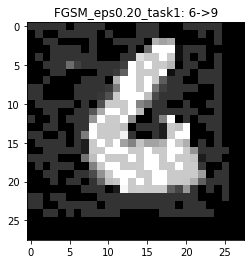

Save the adversarial examples to file [../task1_gen\FGSM_eps0.20_task1.npy].
>>> Generating FGSM_eps0.25_task1(EOT:OFF) examples.
>>> error rate: 0.84


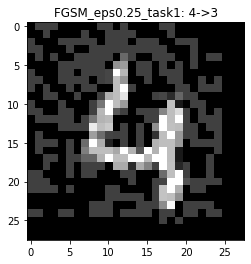

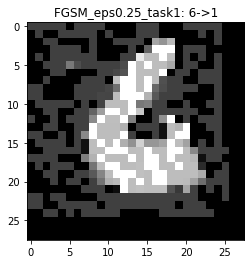

Save the adversarial examples to file [../task1_gen\FGSM_eps0.25_task1.npy].
>>> Generating FGSM_eps0.30_task1(EOT:OFF) examples.
>>> error rate: 0.892


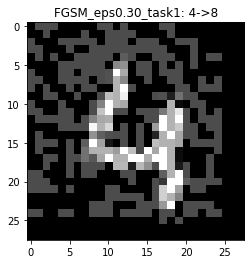

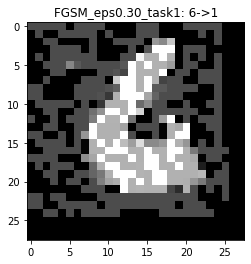

Save the adversarial examples to file [../task1_gen\FGSM_eps0.30_task1.npy].
>>> Generating FGSM_eps0.40_task1(EOT:OFF) examples.
>>> error rate: 0.919


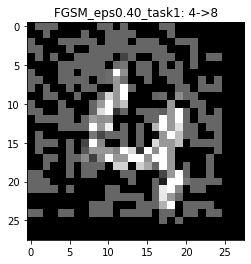

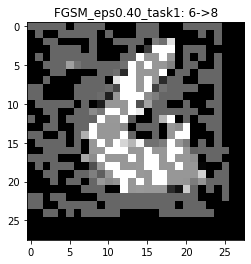

Save the adversarial examples to file [../task1_gen\FGSM_eps0.40_task1.npy].
>>> Generating PGD_eps0.08_Veps_task1(EOT:OFF) examples.
>>> error rate: 0.399


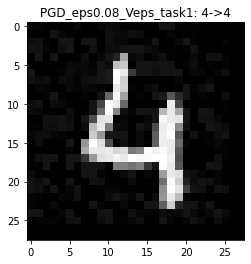

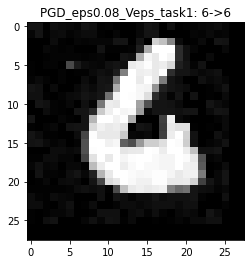

Save the adversarial examples to file [../task1_gen\PGD_eps0.08_Veps_task1.npy].
>>> Generating PGD_eps0.15_Veps_task1(EOT:OFF) examples.
>>> error rate: 0.959


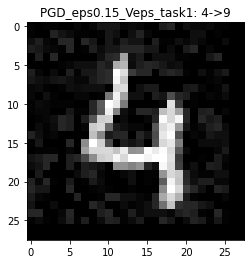

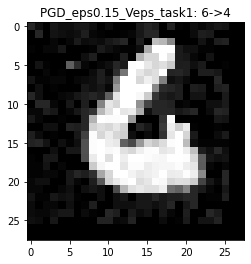

Save the adversarial examples to file [../task1_gen\PGD_eps0.15_Veps_task1.npy].
>>> Generating PGD_eps0.20_Veps_task1(EOT:OFF) examples.
>>> error rate: 0.997


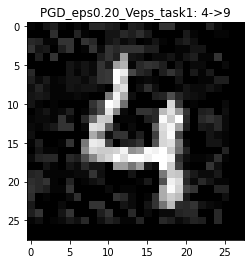

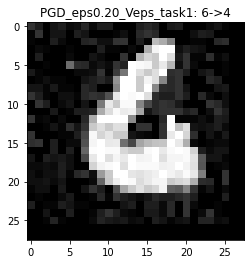

Save the adversarial examples to file [../task1_gen\PGD_eps0.20_Veps_task1.npy].
>>> Generating PGD_eps0.25_Veps_task1(EOT:OFF) examples.
>>> error rate: 1.0


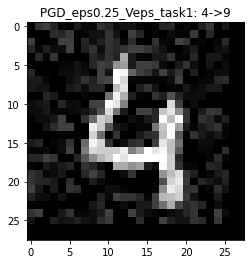

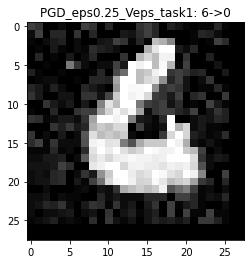

Save the adversarial examples to file [../task1_gen\PGD_eps0.25_Veps_task1.npy].
>>> Generating PGD_eps0.30_Veps_task1(EOT:OFF) examples.
>>> error rate: 1.0


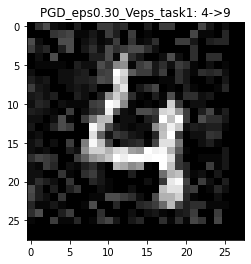

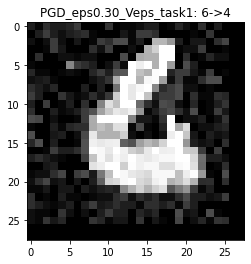

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_Veps_task1.npy].
>>> Generating PGD_eps0.40_Veps_task1(EOT:OFF) examples.
>>> error rate: 1.0


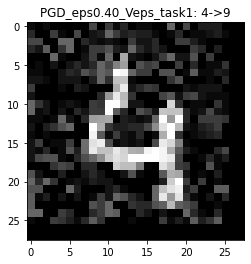

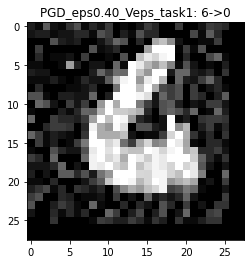

Save the adversarial examples to file [../task1_gen\PGD_eps0.40_Veps_task1.npy].
>>> Generating PGD_eps0.30_estep_0.15_task1(EOT:OFF) examples.
>>> error rate: 1.0


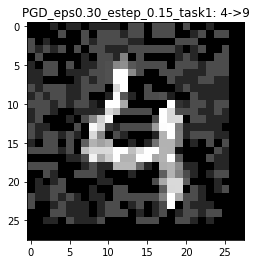

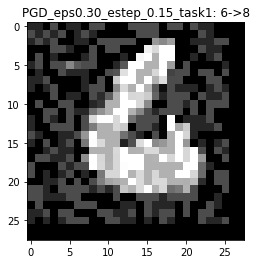

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.15_task1.npy].
>>> Generating PGD_eps0.30_estep_0.10_task1(EOT:OFF) examples.
>>> error rate: 1.0


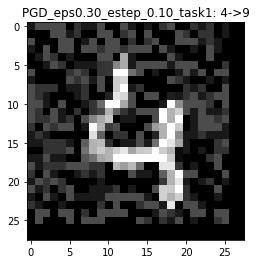

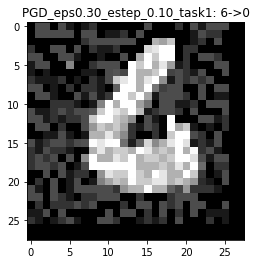

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.10_task1.npy].
>>> Generating PGD_eps0.30_estep_0.06_task1(EOT:OFF) examples.
>>> error rate: 1.0


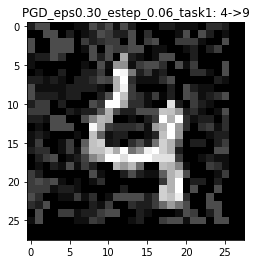

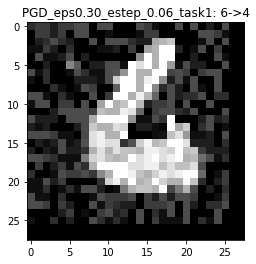

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.06_task1.npy].
>>> Generating PGD_eps0.30_estep_0.03_task1(EOT:OFF) examples.
>>> error rate: 1.0


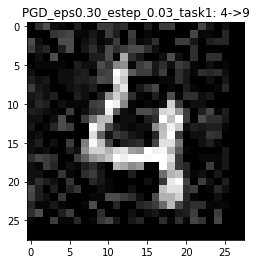

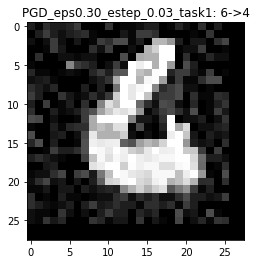

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.03_task1.npy].
>>> Generating PGD_eps0.30_estep_0.02_task1(EOT:OFF) examples.
>>> error rate: 0.997


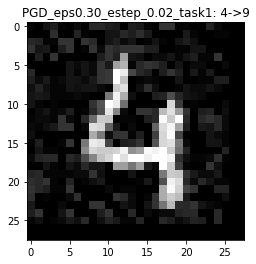

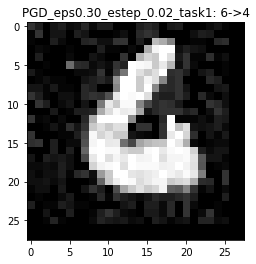

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.02_task1.npy].
>>> Generating PGD_eps0.30_estep_0.015_task1(EOT:OFF) examples.
>>> error rate: 0.959


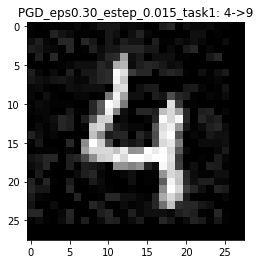

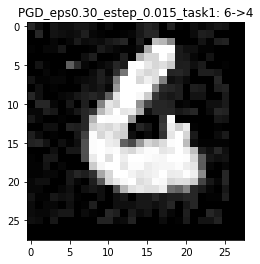

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_estep_0.015_task1.npy].
>>> Generating PGD_eps0.30_max_iter_5_task1(EOT:OFF) examples.
>>> error rate: 0.917


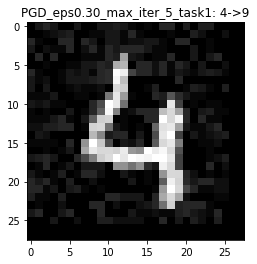

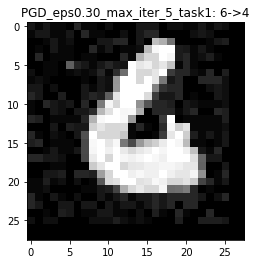

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_max_iter_5_task1.npy].
>>> Generating PGD_eps0.30_max_iter_7_task1(EOT:OFF) examples.
>>> error rate: 0.993


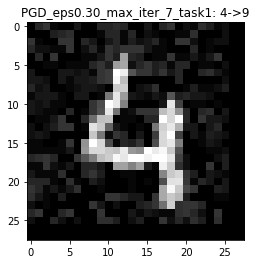

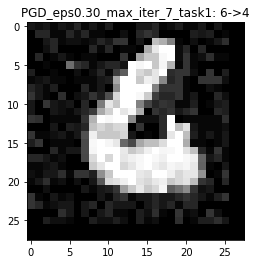

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_max_iter_7_task1.npy].
>>> Generating PGD_eps0.30_max_iter_10_task1(EOT:OFF) examples.
>>> error rate: 1.0


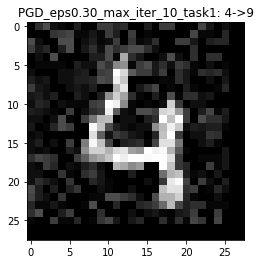

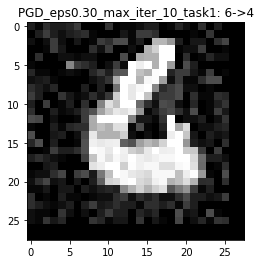

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_max_iter_10_task1.npy].
>>> Generating PGD_eps0.30_max_iter_15_task1(EOT:OFF) examples.
>>> error rate: 1.0


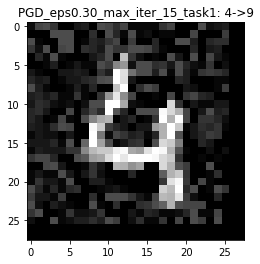

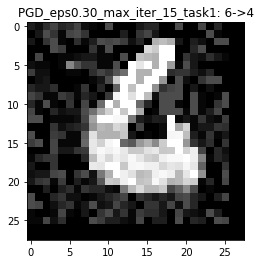

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_max_iter_15_task1.npy].
>>> Generating PGD_eps0.30_max_iter_20_task1(EOT:OFF) examples.
>>> error rate: 1.0


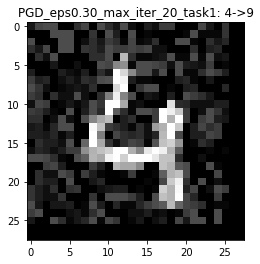

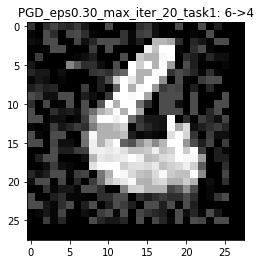

Save the adversarial examples to file [../task1_gen\PGD_eps0.30_max_iter_20_task1.npy].
>>> Generating BIM_eps0.08_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 0.682


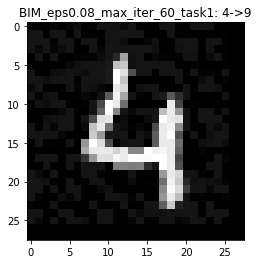

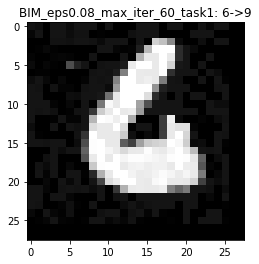

Save the adversarial examples to file [../task1_gen\BIM_eps0.08_max_iter_60_task1.npy].
>>> Generating BIM_eps0.15_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 1.0


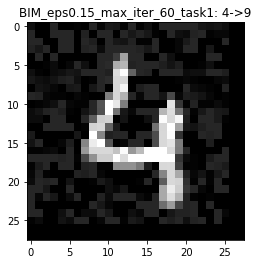

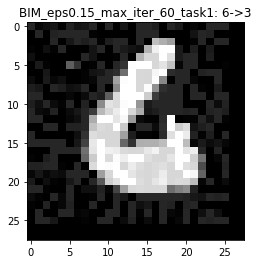

Save the adversarial examples to file [../task1_gen\BIM_eps0.15_max_iter_60_task1.npy].
>>> Generating BIM_eps0.20_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 1.0


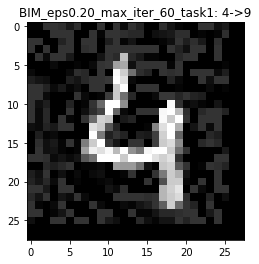

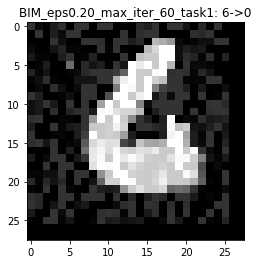

Save the adversarial examples to file [../task1_gen\BIM_eps0.20_max_iter_60_task1.npy].
>>> Generating BIM_eps0.25_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 1.0


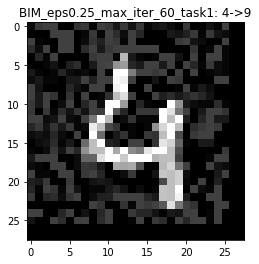

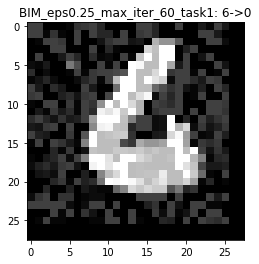

Save the adversarial examples to file [../task1_gen\BIM_eps0.25_max_iter_60_task1.npy].
>>> Generating BIM_eps0.30_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 1.0


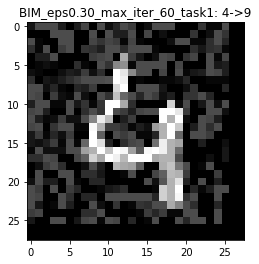

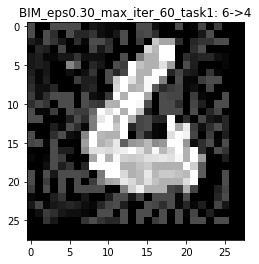

Save the adversarial examples to file [../task1_gen\BIM_eps0.30_max_iter_60_task1.npy].
>>> Generating BIM_eps0.40_max_iter_60_task1(EOT:OFF) examples.
>>> error rate: 1.0


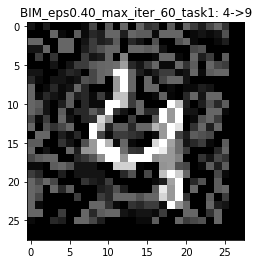

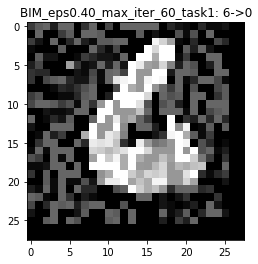

Save the adversarial examples to file [../task1_gen\BIM_eps0.40_max_iter_60_task1.npy].
>>> Generating BIM_eps0.08_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 0.692


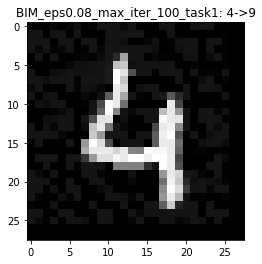

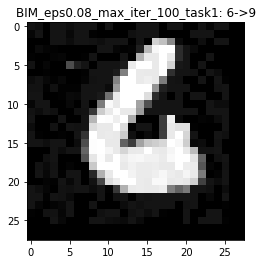

Save the adversarial examples to file [../task1_gen\BIM_eps0.08_max_iter_100_task1.npy].
>>> Generating BIM_eps0.15_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 1.0


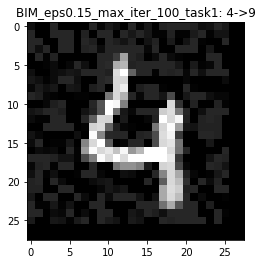

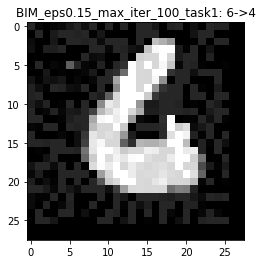

Save the adversarial examples to file [../task1_gen\BIM_eps0.15_max_iter_100_task1.npy].
>>> Generating BIM_eps0.20_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 1.0


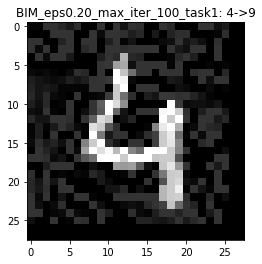

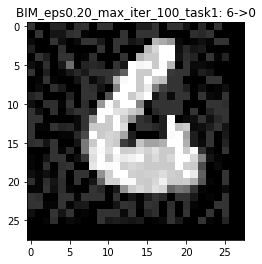

Save the adversarial examples to file [../task1_gen\BIM_eps0.20_max_iter_100_task1.npy].
>>> Generating BIM_eps0.25_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 1.0


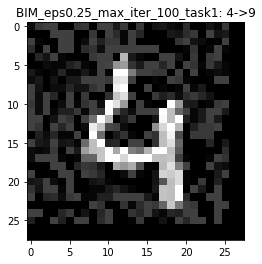

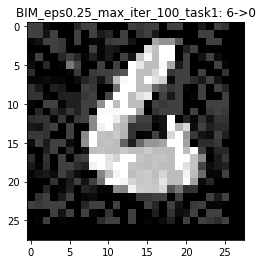

Save the adversarial examples to file [../task1_gen\BIM_eps0.25_max_iter_100_task1.npy].
>>> Generating BIM_eps0.30_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 1.0


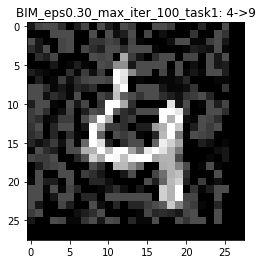

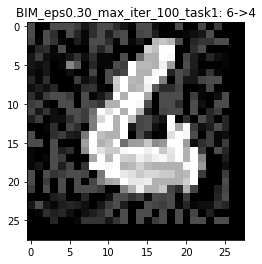

Save the adversarial examples to file [../task1_gen\BIM_eps0.30_max_iter_100_task1.npy].
>>> Generating BIM_eps0.40_max_iter_100_task1(EOT:OFF) examples.
>>> error rate: 1.0


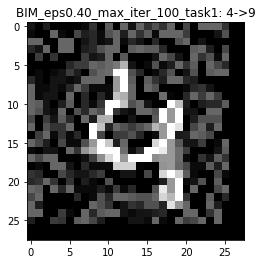

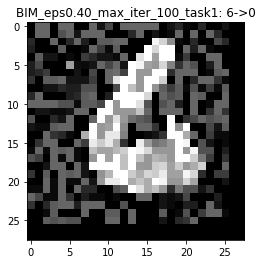

Save the adversarial examples to file [../task1_gen\BIM_eps0.40_max_iter_100_task1.npy].


In [5]:
import time
from utils.model import load_lenet
from utils.metrics import error_rate
from attacks.attack import generate

# loading experiment configurations
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")
attack_configs = load_from_json("../src/configs/demo/attack-zk-mnist.json")

# load the targeted model
model_file = os.path.join(model_configs.get("dir"), model_configs.get("um_file"))
target = load_lenet(file=model_file, wrap=True)

# load the benign samples

data_file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
data_bs = np.load(data_file)
# load the corresponding true labels
label_file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
labels = np.load(label_file)

# generate AEs
# in this project, we generate AEs for all benign samples
data_bs = data_bs[:]
labels = labels[:]
# let save=True and specify an output folder to save the generated AEs
generate_ae(model=target, data=data_bs, labels=labels, attack_configs=attack_configs,save = True, output_dir = "../task1_gen")

# Evaluation of AEs Using Average Output based-on Probability (AVEP) Ensemble Strategy

In [6]:
from utils.model import load_pool
from utils.metrics import error_rate, get_corrections
from models.athena import Ensemble, ENSEMBLE_STRATEGY

# copied from tutorials/eval_model.py
def evaluate(trans_configs, model_configs,
             data_configs, save=False, output_dir=None):
    """
    Apply transformation(s) on images.
    :param trans_configs: dictionary. The collection of the parameterized transformations to test.
        in the form of
        { configsx: {
            param: value,
            }
        }
        The key of a configuration is 'configs'x, where 'x' is the id of corresponding weak defense.
    :param model_configs:  dictionary. Defines model related information.
        Such as, location, the undefended model, the file format, etc.
    :param data_configs: dictionary. Defines data related information.
        Such as, location, the file for the true labels, the file for the benign samples,
        the files for the adversarial examples, etc.
    :param save: boolean. Save the transformed sample or not.
    :param output_dir: path or str. The location to store the transformed samples.
        It cannot be None when save is True.
    :return:
    """
    # Load the baseline defense (PGD-ADT model)
    baseline = load_lenet(file=model_configs.get('pgd_trained'), trans_configs=None,
                                  use_logits=False, wrap=False)

    # get the undefended model (UM)
    file = os.path.join(model_configs.get('dir'), model_configs.get('um_file'))
    undefended = load_lenet(file=file,
                            trans_configs=trans_configs.get('configs0'),
                            wrap=True)
    print(">>> um:", type(undefended))

    # load weak defenses into a pool
    pool, _ = load_pool(trans_configs=trans_configs,
                        model_configs=model_configs,
                        active_list=True,
                        wrap=True)
    # create an AVEP ensemble from the WD pool
    wds = list(pool.values())
    print(">>> wds:", type(wds), type(wds[0]))
    ensemble = Ensemble(classifiers=wds, strategy=ENSEMBLE_STRATEGY.AVEP.value)

    # load the benign samples
    bs_file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
    x_bs = np.load(bs_file)
    img_rows, img_cols = x_bs.shape[1], x_bs.shape[2]

    # load the corresponding true labels
    label_file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
    labels = np.load(label_file)

    # get indices of benign samples that are correctly classified by the targeted model
    print(">>> Evaluating UM on [{}], it may take a while...".format(bs_file))
    pred_bs = undefended.predict(x_bs)
    corrections = get_corrections(y_pred=pred_bs, y_true=labels)

    # Evaluate AEs.
    results = {}
    eval_result = {}
#     ae_list = data_configs.get('ae_files')
    ae_list = data_configs.get('task1_aes')
    
    for i in ae_list:
        ae_file = os.path.join(data_configs.get('dir'), i)
#         print(type(ae_file))
#         print(ae_file)
        #print(ae_list[4])
        x_adv = np.load(ae_file)

        # evaluate the undefended model on the AE
        print(">>> Evaluating UM on [{}], it may take a while...".format(ae_file))
        pred_adv_um = undefended.predict(x_adv)
        err_um = error_rate(y_pred=pred_adv_um, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['UM'] = err_um
        if 'UM' not in eval_result:
            eval_result['UM'] = [err_um]
        else:
            eval_result['UM'].append(err_um)

        # evaluate the ensemble on the AE
        print(">>> Evaluating ensemble on [{}], it may take a while...".format(ae_file))
        pred_adv_ens = ensemble.predict(x_adv)
        err_ens = error_rate(y_pred=pred_adv_ens, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['Ensemble'] = err_ens
        if 'Ensemble' not in eval_result:
            eval_result['Ensemble'] = [err_ens]
        else:
            eval_result['Ensemble'].append(err_ens)

        # evaluate the baseline on the AE
        print(">>> Evaluating baseline model on [{}], it may take a while...".format(ae_file))
        pred_adv_bl = baseline.predict(x_adv)
        err_bl = error_rate(y_pred=pred_adv_bl, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['PGD-ADT'] = err_bl
        if 'PGD-ADT' not in eval_result:
            eval_result['PGD-ADT'] = [err_bl]
        else:
            eval_result['PGD-ADT'].append(err_bl)

        # TODO: collect and dump the evaluation results to file(s) such that you can analyze them later.
        print(">>> Evaluations on [{}]:\n{}".format(ae_file, results))
    print(eval_result)
    return eval_result

## Evaluation of AEs on Athena Model on With 10 WDs Using AVEP Ensemble Strategy

In [7]:
# load experiment configurations
trans_configs = load_from_json("../src/configs/demo/athena-mnist.json")
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")

output_root = "../results"

# evaluate
eval_10_AVEP = evaluate(trans_configs=trans_configs,
         model_configs=model_configs,
         data_configs=data_configs,
         save=True,
         output_dir=output_root)

>>> Loading model [../models/baseline/advTrained-mnist-adtC.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> um: <class 'models.keraswrapper.WeakDefense'>
>>> Loading model [../models/cnn/model-mnist-cnn-rotate90.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_bottom_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-flip_horizontal.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_both_stretch.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-morph_gradient.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_mean_type3.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-distort_y.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-filter_gaussian.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-compress_jpeg_quality_80.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-denoise_nl_means_fast.h5]...
>>> Loaded 10 models.
>>> wds: <class 'list'> <class 'models.keraswrapper.WeakDefense'>
>>>

>>> Evaluating ensemble on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_estep_0.15_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.5419615773508595, 'PGD-ADT': 0.2770475227502528}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_max_iter_5_task1.npy]:
{'UM': 0.9059656218402427, 'Ensemble': 0.028311425682507583, 'PGD-ADT': 0.03741152679474216}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_7_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_7_task1.npy], it may take a while...
>>> Evaluating baseline model on 

## Plots of Error-rates of The AEs evaluated using 10 WDs with AVEP Ensemble Strategy

[0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465]
[0.012133468149646108, 0.030333670374115267, 0.07077856420626896, 0.18402426693629928, 0.4448938321536906, 0.8250758341759353]
[0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474]
[0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.012133468149646108, 0.033367037411526794, 0.06268958543983821, 0.10616784630940344, 0.18604651162790697, 0.4206268958543984]
[0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383]
[0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.033367037411526794, 0.06268958543983821, 0.18604651162790697, 0.39838220424671383, 0.48938321536905965, 0.5419615773508595]

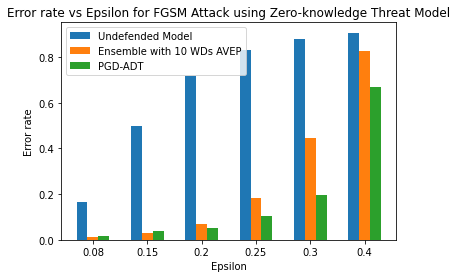

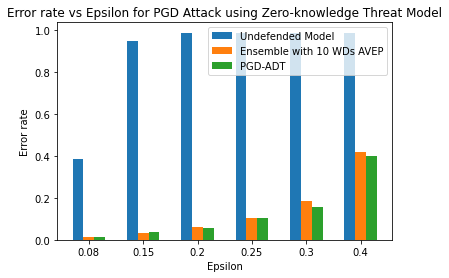

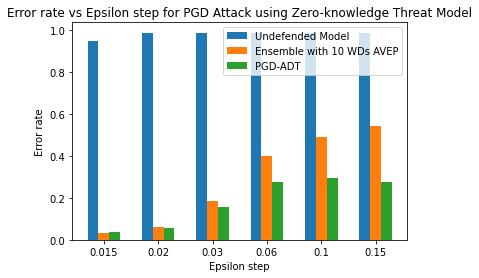

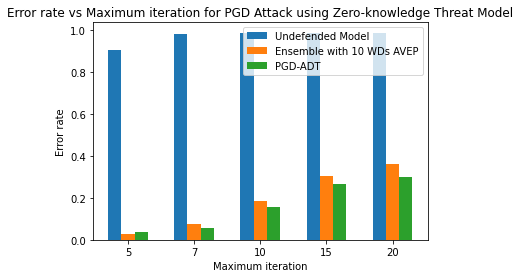

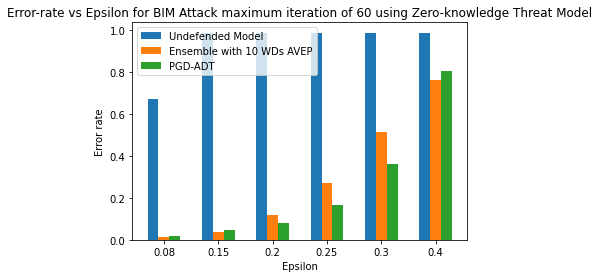

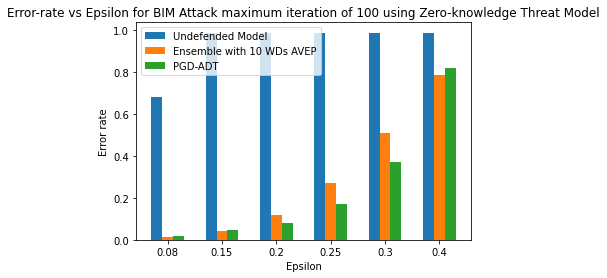

In [8]:
import matplotlib.pyplot as plt
import numpy as np


FGSM_err_eps_task1 = {}
PGD_err_eps_task1 = {}
PGD_err_estep_task1 = {}
PGD_err_miter_task1 = {}
BIM_err_miter_60 = {}
BIM_err_miter_100 = {}

#for FGSM aes varying epsilon
FGSM_err_eps_task1['UM'] = eval_10_AVEP['UM'][:6]
FGSM_err_eps_task1['Ensemble'] = eval_10_AVEP['Ensemble'][:6]
FGSM_err_eps_task1['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][:6]
print(FGSM_err_eps_task1['UM'])
print(FGSM_err_eps_task1['Ensemble'])
print(FGSM_err_eps_task1['PGD-ADT'])

# for PGD aes varying epsilon
PGD_err_eps_task1['UM'] = eval_10_AVEP['UM'][6:12]
PGD_err_eps_task1['Ensemble'] = eval_10_AVEP['Ensemble'][6:12]
PGD_err_eps_task1['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][6:12]
print(PGD_err_eps_task1['UM'])
print(PGD_err_eps_task1['Ensemble'])
print(PGD_err_eps_task1['PGD-ADT'])

# for PGD aes at 0.3 eps varying epsilon-step
PGD_err_estep_task1['UM'] = eval_10_AVEP['UM'][12:18]
PGD_err_estep_task1['Ensemble'] = eval_10_AVEP['Ensemble'][12:18]
PGD_err_estep_task1['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][12:18]
print(PGD_err_estep_task1['UM'])
print(PGD_err_estep_task1['Ensemble'])
print(PGD_err_estep_task1['PGD-ADT'])

# for PGD aes at 0.3 eps, 0.03 estep varying max-iteration
PGD_err_miter_task1['UM'] = eval_10_AVEP['UM'][18:23]
PGD_err_miter_task1['Ensemble'] = eval_10_AVEP['Ensemble'][18:23]
PGD_err_miter_task1['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][18:23]
print(PGD_err_miter_task1['UM'])
print(PGD_err_miter_task1['Ensemble'])
print(PGD_err_miter_task1['PGD-ADT'])

# for BIM aes at maximum iteration of 60, varying epsilon,
BIM_err_miter_60['UM'] = eval_10_AVEP['UM'][23:29]
BIM_err_miter_60['Ensemble'] = eval_10_AVEP['Ensemble'][23:29]
BIM_err_miter_60['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][23:29]
print(BIM_err_miter_60['UM'])
print(BIM_err_miter_60['Ensemble'])
print(BIM_err_miter_60['PGD-ADT'])

# for BIM aes at maximum iteration of 100, varying epsilon,
BIM_err_miter_100['UM'] = eval_10_AVEP['UM'][29:]
BIM_err_miter_100['Ensemble'] = eval_10_AVEP['Ensemble'][29:]
BIM_err_miter_100['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][29:]
print(BIM_err_miter_100['UM'])
print(BIM_err_miter_100['Ensemble'])
print(BIM_err_miter_100['PGD-ADT'])


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM Plot Plots of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_err_eps_task1['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, FGSM_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for FGSM Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40]
#For PGD Plot of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_eps_task1['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, PGD_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.015, 0.02, 0.03, 0.06, 0.10, 0.15]
# Plots of Error rates in PGD varying Epsilon Step
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_estep_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_estep_task1['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, PGD_err_estep_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon step')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon step for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [5, 7, 10, 15, 20]
#Plots of Error rates in PGD varying Maximum Iterations
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_miter_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_miter_task1['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, PGD_err_miter_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Maximum iteration')
plt.ylabel('Error rate')
plt.title('Error rate vs Maximum iteration for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


# BIM_err_miter_60 = {}
# BIM_err_miter_100 = {}
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 60
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_60['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_60['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, BIM_err_miter_60['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 60 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 100
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_100['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_100['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, BIM_err_miter_100['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 100 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

## Evaluation of AEs on Athena Model on With 20 WDs Using AVEP Ensemble Strategy

In [9]:
# load experiment configurations
trans_configs = load_from_json("../src/configs/demo/athena-mnist.json")
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")

output_root = "../results"

# evaluate
eval_20_AVEP = evaluate(trans_configs=trans_configs,
         model_configs=model_configs,
         data_configs=data_configs,
         save=True,
         output_dir=output_root)

>>> Loading model [../models/baseline/advTrained-mnist-adtC.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> um: <class 'models.keraswrapper.WeakDefense'>
>>> Loading model [../models/cnn/model-mnist-cnn-rotate90.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_top_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_bottom_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-flip_horizontal.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_horizontal_compress.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_both_stretch.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-morph_gradient.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_mean_type3.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_gaussian_type4.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-distort_y.h5]...
>>> Loading model [../

C:\Users\hezek\Documents\ML\project-athena-master\src\models\image_processor.py:65: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  return _filter_trans(X, trans_args)
C:\Users\hezek\Documents\ML\project-athena-master\src\models\image_processor.py:73: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  return _segment_trans(X, trans_args)


>>> Evaluating baseline model on [../data/FGSM_eps0.08_task1.npy], it may take a while...
>>> Evaluations on [../data/FGSM_eps0.08_task1.npy]:
{'UM': 0.16683518705763398, 'Ensemble': 0.011122345803842264, 'PGD-ADT': 0.015166835187057633}
>>> Evaluating UM on [../data/FGSM_eps0.15_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/FGSM_eps0.15_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/FGSM_eps0.15_task1.npy], it may take a while...
>>> Evaluations on [../data/FGSM_eps0.15_task1.npy]:
{'UM': 0.5005055611729019, 'Ensemble': 0.023255813953488372, 'PGD-ADT': 0.03741152679474216}
>>> Evaluating UM on [../data/FGSM_eps0.20_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/FGSM_eps0.20_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/FGSM_eps0.20_task1.npy], it may take a while...
>>> Evaluations on [../data/FGSM_eps0.20_task1.npy]:
{'UM': 0.717896865520728, 'Ensemble': 0.054600606673407485,

>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_10_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_max_iter_10_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_max_iter_10_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.14459049544994945, 'PGD-ADT': 0.15874620829120323}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_15_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_15_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_max_iter_15_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_max_iter_15_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.243680485338726, 'PGD-ADT': 0.2659251769464105}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_20_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_20_task1.npy], it may take a while...
>>> Evaluating baseline mo

[0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465]
[0.011122345803842264, 0.023255813953488372, 0.054600606673407485, 0.13751263902932254, 0.3437815975733064, 0.7593528816986855]
[0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474]
[0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.012133468149646108, 0.028311425682507583, 0.046511627906976744, 0.07785642062689585, 0.14560161779575329, 0.33367037411526795]
[0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383]
[0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.028311425682507583, 0.046511627906976744, 0.14560161779575329, 0.3083923154701719, 0.41456016177957533, 0.44489383215369

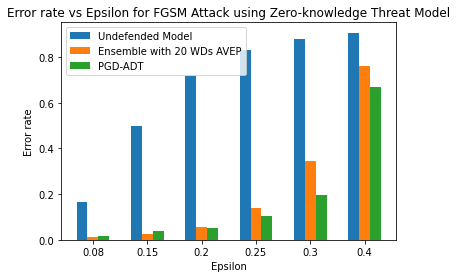

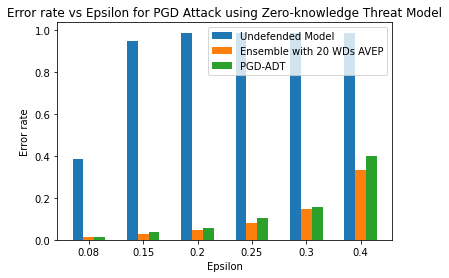

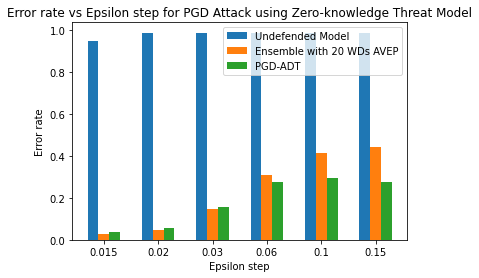

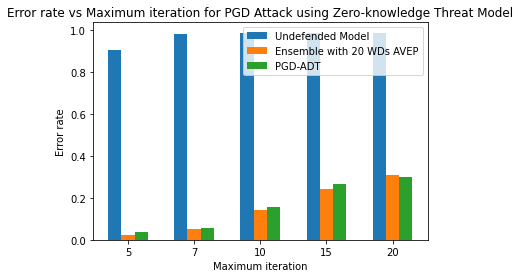

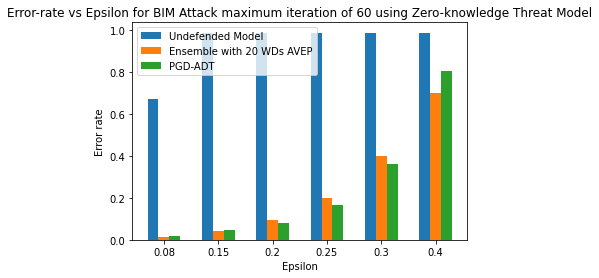

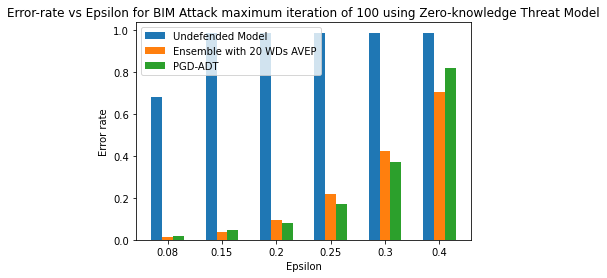

In [16]:
import matplotlib.pyplot as plt
import numpy as np


FGSM_err_eps_task1 = {}
PGD_err_eps_task1 = {}
PGD_err_estep_task1 = {}
PGD_err_miter_task1 = {}
BIM_err_miter_60 = {}
BIM_err_miter_100 = {}

#for FGSM aes varying epsilon
FGSM_err_eps_task1['UM'] = eval_20_AVEP['UM'][:6]
FGSM_err_eps_task1['Ensemble'] = eval_20_AVEP['Ensemble'][:6]
FGSM_err_eps_task1['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][:6]
print(FGSM_err_eps_task1['UM'])
print(FGSM_err_eps_task1['Ensemble'])
print(FGSM_err_eps_task1['PGD-ADT'])

# for PGD aes varying epsilon
PGD_err_eps_task1['UM'] = eval_20_AVEP['UM'][6:12]
PGD_err_eps_task1['Ensemble'] = eval_20_AVEP['Ensemble'][6:12]
PGD_err_eps_task1['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][6:12]
print(PGD_err_eps_task1['UM'])
print(PGD_err_eps_task1['Ensemble'])
print(PGD_err_eps_task1['PGD-ADT'])

# for PGD aes at 0.3 eps varying epsilon-step
PGD_err_estep_task1['UM'] = eval_20_AVEP['UM'][12:18]
PGD_err_estep_task1['Ensemble'] = eval_20_AVEP['Ensemble'][12:18]
PGD_err_estep_task1['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][12:18]
print(PGD_err_estep_task1['UM'])
print(PGD_err_estep_task1['Ensemble'])
print(PGD_err_estep_task1['PGD-ADT'])

# for PGD aes at 0.3 eps, 0.03 estep varying max-iteration
PGD_err_miter_task1['UM'] = eval_20_AVEP['UM'][18:23]
PGD_err_miter_task1['Ensemble'] = eval_20_AVEP['Ensemble'][18:23]
PGD_err_miter_task1['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][18:23]
print(PGD_err_miter_task1['UM'])
print(PGD_err_miter_task1['Ensemble'])
print(PGD_err_miter_task1['PGD-ADT'])

# for BIM aes at maximum iteration of 60, varying epsilon,
BIM_err_miter_60['UM'] = eval_20_AVEP['UM'][23:29]
BIM_err_miter_60['Ensemble'] = eval_20_AVEP['Ensemble'][23:29]
BIM_err_miter_60['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][23:29]
print(BIM_err_miter_60['UM'])
print(BIM_err_miter_60['Ensemble'])
print(BIM_err_miter_60['PGD-ADT'])

# for BIM aes at maximum iteration of 100, varying epsilon,
BIM_err_miter_100['UM'] = eval_20_AVEP['UM'][29:]
BIM_err_miter_100['Ensemble'] = eval_20_AVEP['Ensemble'][29:]
BIM_err_miter_100['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][29:]
print(BIM_err_miter_100['UM'])
print(BIM_err_miter_100['Ensemble'])
print(BIM_err_miter_100['PGD-ADT'])


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM Plot Plots of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_err_eps_task1['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, FGSM_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for FGSM Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40]
#For PGD Plot of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_eps_task1['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, PGD_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.015, 0.02, 0.03, 0.06, 0.10, 0.15]
# Plots of Error rates in PGD varying Epsilon Step
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_estep_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_estep_task1['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, PGD_err_estep_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon step')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon step for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [5, 7, 10, 15, 20]
#Plots of Error rates in PGD varying Maximum Iterations
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_miter_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_miter_task1['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, PGD_err_miter_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Maximum iteration')
plt.ylabel('Error rate')
plt.title('Error rate vs Maximum iteration for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


# BIM_err_miter_60 = {}
# BIM_err_miter_100 = {}
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 60
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_60['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_60['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, BIM_err_miter_60['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 60 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 100
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_100['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_100['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, BIM_err_miter_100['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 100 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# Evaluation of AEs Using Majority Voting (MV) Ensemble Strategy



In [11]:
from utils.model import load_pool
from utils.metrics import error_rate, get_corrections
from models.athena import Ensemble, ENSEMBLE_STRATEGY

# copied from tutorials/eval_model.py
def evaluate(trans_configs, model_configs,
             data_configs, save=False, output_dir=None):
    """
    Apply transformation(s) on images.
    :param trans_configs: dictionary. The collection of the parameterized transformations to test.
        in the form of
        { configsx: {
            param: value,
            }
        }
        The key of a configuration is 'configs'x, where 'x' is the id of corresponding weak defense.
    :param model_configs:  dictionary. Defines model related information.
        Such as, location, the undefended model, the file format, etc.
    :param data_configs: dictionary. Defines data related information.
        Such as, location, the file for the true labels, the file for the benign samples,
        the files for the adversarial examples, etc.
    :param save: boolean. Save the transformed sample or not.
    :param output_dir: path or str. The location to store the transformed samples.
        It cannot be None when save is True.
    :return:
    """
    # Load the baseline defense (PGD-ADT model)
    baseline = load_lenet(file=model_configs.get('pgd_trained'), trans_configs=None,
                                  use_logits=False, wrap=False)

    # get the undefended model (UM)
    file = os.path.join(model_configs.get('dir'), model_configs.get('um_file'))
    undefended = load_lenet(file=file,
                            trans_configs=trans_configs.get('configs0'),
                            wrap=True)
    print(">>> um:", type(undefended))

    # load weak defenses into a pool
    pool, _ = load_pool(trans_configs=trans_configs,
                        model_configs=model_configs,
                        active_list=True,
                        wrap=True)
    # create an AVEP ensemble from the WD pool
    wds = list(pool.values())
    print(">>> wds:", type(wds), type(wds[0]))
    ensemble = Ensemble(classifiers=wds, strategy=ENSEMBLE_STRATEGY.MV.value)

    # load the benign samples
    bs_file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
    x_bs = np.load(bs_file)
    img_rows, img_cols = x_bs.shape[1], x_bs.shape[2]

    # load the corresponding true labels
    label_file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
    labels = np.load(label_file)

    # get indices of benign samples that are correctly classified by the targeted model
    print(">>> Evaluating UM on [{}], it may take a while...".format(bs_file))
    pred_bs = undefended.predict(x_bs)
    corrections = get_corrections(y_pred=pred_bs, y_true=labels)

    # Evaluate AEs.
    results = {}
    eval_result = {}
#     ae_list = data_configs.get('ae_files')
    ae_list = data_configs.get('task1_aes')
    
    for i in ae_list:
        ae_file = os.path.join(data_configs.get('dir'), i)
#         print(type(ae_file))
#         print(ae_file)
        #print(ae_list[4])
        x_adv = np.load(ae_file)

        # evaluate the undefended model on the AE
        print(">>> Evaluating UM on [{}], it may take a while...".format(ae_file))
        pred_adv_um = undefended.predict(x_adv)
        err_um = error_rate(y_pred=pred_adv_um, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['UM'] = err_um
        if 'UM' not in eval_result:
            eval_result['UM'] = [err_um]
        else:
            eval_result['UM'].append(err_um)

        # evaluate the ensemble on the AE
        print(">>> Evaluating ensemble on [{}], it may take a while...".format(ae_file))
        pred_adv_ens = ensemble.predict(x_adv)
        err_ens = error_rate(y_pred=pred_adv_ens, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['Ensemble'] = err_ens
        if 'Ensemble' not in eval_result:
            eval_result['Ensemble'] = [err_ens]
        else:
            eval_result['Ensemble'].append(err_ens)

        # evaluate the baseline on the AE
        print(">>> Evaluating baseline model on [{}], it may take a while...".format(ae_file))
        pred_adv_bl = baseline.predict(x_adv)
        err_bl = error_rate(y_pred=pred_adv_bl, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['PGD-ADT'] = err_bl
        if 'PGD-ADT' not in eval_result:
            eval_result['PGD-ADT'] = [err_bl]
        else:
            eval_result['PGD-ADT'].append(err_bl)

        # TODO: collect and dump the evaluation results to file(s) such that you can analyze them later.
        print(">>> Evaluations on [{}]:\n{}".format(ae_file, results))
    print(eval_result)
    return eval_result

## Evaluation of AEs on Athena Model on With 10 WDs Using MV Ensemble Strategy

In [12]:
# load experiment configurations
trans_configs = load_from_json("../src/configs/demo/athena-mnist.json")
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")

output_root = "../results"

# evaluate
eval_10_MV = evaluate(trans_configs=trans_configs,
         model_configs=model_configs,
         data_configs=data_configs,
         save=True,
         output_dir=output_root)

>>> Loading model [../models/baseline/advTrained-mnist-adtC.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> um: <class 'models.keraswrapper.WeakDefense'>
>>> Loading model [../models/cnn/model-mnist-cnn-rotate90.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_bottom_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-flip_horizontal.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_both_stretch.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-morph_gradient.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_mean_type3.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-distort_y.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-filter_gaussian.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-compress_jpeg_quality_80.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-denoise_nl_means_fast.h5]...
>>> Loaded 10 models.
>>> wds: <class 'list'> <class 'models.keraswrapper.WeakDefense'>
>>>

>>> Evaluating ensemble on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_estep_0.15_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.5419615773508595, 'PGD-ADT': 0.2770475227502528}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_max_iter_5_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_max_iter_5_task1.npy]:
{'UM': 0.9059656218402427, 'Ensemble': 0.028311425682507583, 'PGD-ADT': 0.03741152679474216}
>>> Evaluating UM on [../data/PGD_eps0.30_max_iter_7_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_max_iter_7_task1.npy], it may take a while...
>>> Evaluating baseline model on 

## Plots of Error-rates of the AEs evaluated using 10 WDs with MV Ensemble Strategy

[0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465]
[0.012133468149646108, 0.030333670374115267, 0.07077856420626896, 0.18402426693629928, 0.4448938321536906, 0.8250758341759353]
[0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474]
[0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.012133468149646108, 0.033367037411526794, 0.06268958543983821, 0.10616784630940344, 0.18604651162790697, 0.4206268958543984]
[0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383]
[0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.033367037411526794, 0.06268958543983821, 0.18604651162790697, 0.39838220424671383, 0.48938321536905965, 0.5419615773508595]

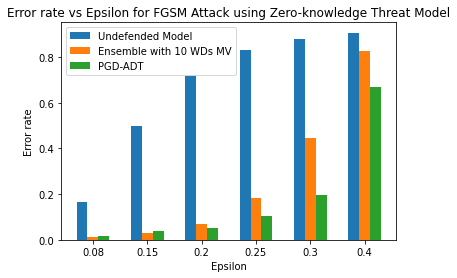

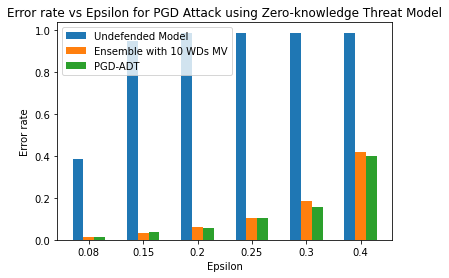

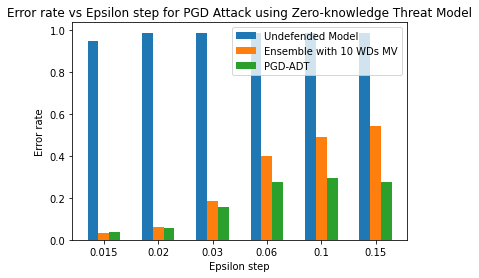

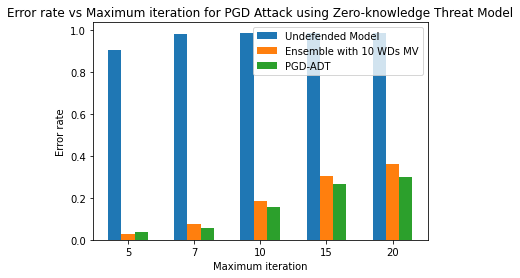

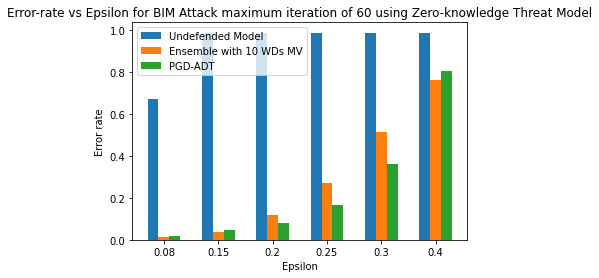

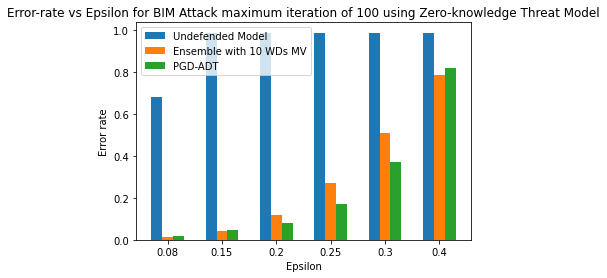

In [17]:
import matplotlib.pyplot as plt
import numpy as np


FGSM_err_eps_task1 = {}
PGD_err_eps_task1 = {}
PGD_err_estep_task1 = {}
PGD_err_miter_task1 = {}
BIM_err_miter_60 = {}
BIM_err_miter_100 = {}

#for FGSM aes varying epsilon
FGSM_err_eps_task1['UM'] = eval_10_MV['UM'][:6]
FGSM_err_eps_task1['Ensemble'] = eval_10_MV['Ensemble'][:6]
FGSM_err_eps_task1['PGD-ADT'] = eval_10_MV['PGD-ADT'][:6]
print(FGSM_err_eps_task1['UM'])
print(FGSM_err_eps_task1['Ensemble'])
print(FGSM_err_eps_task1['PGD-ADT'])

# for PGD aes varying epsilon
PGD_err_eps_task1['UM'] = eval_10_MV['UM'][6:12]
PGD_err_eps_task1['Ensemble'] = eval_10_MV['Ensemble'][6:12]
PGD_err_eps_task1['PGD-ADT'] = eval_10_MV['PGD-ADT'][6:12]
print(PGD_err_eps_task1['UM'])
print(PGD_err_eps_task1['Ensemble'])
print(PGD_err_eps_task1['PGD-ADT'])

# for PGD aes at 0.3 eps varying epsilon-step
PGD_err_estep_task1['UM'] = eval_10_MV['UM'][12:18]
PGD_err_estep_task1['Ensemble'] = eval_10_MV['Ensemble'][12:18]
PGD_err_estep_task1['PGD-ADT'] = eval_10_MV['PGD-ADT'][12:18]
print(PGD_err_estep_task1['UM'])
print(PGD_err_estep_task1['Ensemble'])
print(PGD_err_estep_task1['PGD-ADT'])

# for PGD aes at 0.3 eps, 0.03 estep varying max-iteration
PGD_err_miter_task1['UM'] = eval_10_MV['UM'][18:23]
PGD_err_miter_task1['Ensemble'] = eval_10_MV['Ensemble'][18:23]
PGD_err_miter_task1['PGD-ADT'] = eval_10_MV['PGD-ADT'][18:23]
print(PGD_err_miter_task1['UM'])
print(PGD_err_miter_task1['Ensemble'])
print(PGD_err_miter_task1['PGD-ADT'])

# for BIM aes at maximum iteration of 60, varying epsilon,
BIM_err_miter_60['UM'] = eval_10_AVEP['UM'][23:29]
BIM_err_miter_60['Ensemble'] = eval_10_AVEP['Ensemble'][23:29]
BIM_err_miter_60['PGD-ADT'] = eval_10_AVEP['PGD-ADT'][23:29]
print(BIM_err_miter_60['UM'])
print(BIM_err_miter_60['Ensemble'])
print(BIM_err_miter_60['PGD-ADT'])

# for BIM aes at maximum iteration of 100, varying epsilon,
BIM_err_miter_100['UM'] = eval_10_MV['UM'][29:]
BIM_err_miter_100['Ensemble'] = eval_10_MV['Ensemble'][29:]
BIM_err_miter_100['PGD-ADT'] = eval_10_MV['PGD-ADT'][29:]
print(BIM_err_miter_100['UM'])
print(BIM_err_miter_100['Ensemble'])
print(BIM_err_miter_100['PGD-ADT'])


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM Plot Plots of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_err_eps_task1['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, FGSM_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for FGSM Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40]
#For PGD Plot of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_eps_task1['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, PGD_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.015, 0.02, 0.03, 0.06, 0.10, 0.15]
# Plots of Error rates in PGD varying Epsilon Step
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_estep_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_estep_task1['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, PGD_err_estep_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon step')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon step for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [5, 7, 10, 15, 20]
#Plots of Error rates in PGD varying Maximum Iterations
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_miter_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_miter_task1['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, PGD_err_miter_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Maximum iteration')
plt.ylabel('Error rate')
plt.title('Error rate vs Maximum iteration for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


# BIM_err_miter_60 = {}
# BIM_err_miter_100 = {}
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 60
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_60['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_60['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, BIM_err_miter_60['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 60 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 100
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_100['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_100['Ensemble'], w , label='Ensemble with 10 WDs MV')
plt.bar(bar3, BIM_err_miter_100['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 100 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

## Evaluation of AEs on Athena Model on With 20 WDs Using MV Ensemble Strategy

In [14]:
# load experiment configurations
trans_configs = load_from_json("../src/configs/demo/athena-mnist.json")
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")

output_root = "../results"

# evaluate
eval_20_MV = evaluate(trans_configs=trans_configs,
         model_configs=model_configs,
         data_configs=data_configs,
         save=True,
         output_dir=output_root)

>>> Loading model [../models/baseline/advTrained-mnist-adtC.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> um: <class 'models.keraswrapper.WeakDefense'>
>>> Loading model [../models/cnn/model-mnist-cnn-rotate90.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_top_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-shift_bottom_left.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-flip_horizontal.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_horizontal_compress.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_both_stretch.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-morph_gradient.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_mean_type3.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-cartoon_gaussian_type4.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-distort_y.h5]...
>>> Loading model [../

>>> Evaluations on [../data/PGD_eps0.30_estep_0.06_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.30738119312436807, 'PGD-ADT': 0.27401415571284127}
>>> Evaluating UM on [../data/PGD_eps0.30_estep_0.10_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_estep_0.10_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_estep_0.10_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_estep_0.10_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.4084934277047523, 'PGD-ADT': 0.29625884732052576}
>>> Evaluating UM on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluating ensemble on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluating baseline model on [../data/PGD_eps0.30_estep_0.15_task1.npy], it may take a while...
>>> Evaluations on [../data/PGD_eps0.30_estep_0.15_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.44590495449949447, 'PGD

>>> Evaluating baseline model on [../data/BIM_eps0.40_max_iter_100_task1.npy], it may take a while...
>>> Evaluations on [../data/BIM_eps0.40_max_iter_100_task1.npy]:
{'UM': 0.9888776541961577, 'Ensemble': 0.7057633973710818, 'PGD-ADT': 0.8220424671385238}
{'UM': [0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465, 0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9059656218402427, 0.9817997977755308, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6703741152679474, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6804853387259858, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577], 'Ensemble': [0.010111223458038422,

## Plots of Error-rates of the AEs evaluated using 20 WDs with MV Ensemble Strategy

[0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465]
[0.010111223458038422, 0.023255813953488372, 0.05358948432760364, 0.13144590495449948, 0.3437815975733064, 0.7573306370070778]
[0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474]
[0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.011122345803842264, 0.029322548028311426, 0.046511627906976744, 0.07684529828109202, 0.14560161779575329, 0.3346814964610718]
[0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383]
[0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577]
[0.027300303336703743, 0.047522750252780584, 0.14762386248736098, 0.30738119312436807, 0.4084934277047523, 0.4459049544994944

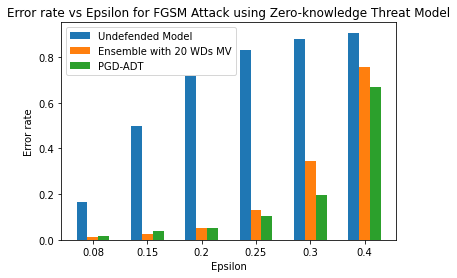

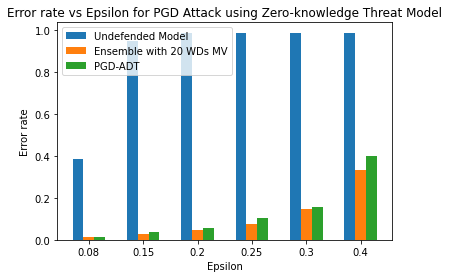

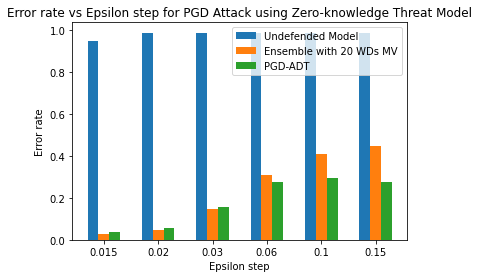

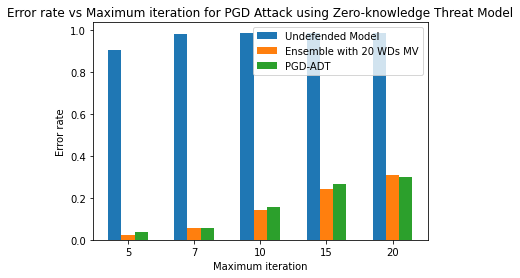

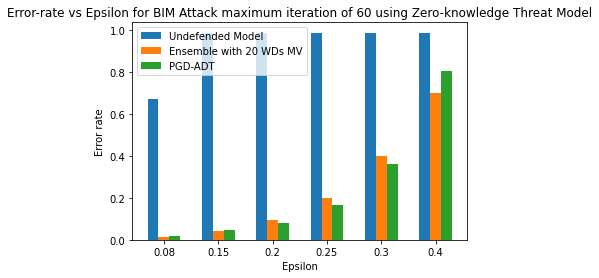

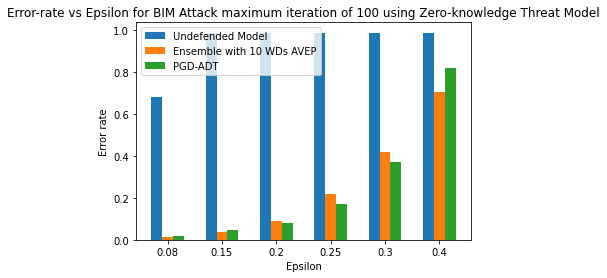

In [18]:
import matplotlib.pyplot as plt
import numpy as np


FGSM_err_eps_task1 = {}
PGD_err_eps_task1 = {}
PGD_err_estep_task1 = {}
PGD_err_miter_task1 = {}
BIM_err_miter_60 = {}
BIM_err_miter_100 = {}

#for FGSM aes varying epsilon
FGSM_err_eps_task1['UM'] = eval_20_MV['UM'][:6]
FGSM_err_eps_task1['Ensemble'] = eval_20_MV['Ensemble'][:6]
FGSM_err_eps_task1['PGD-ADT'] = eval_20_MV['PGD-ADT'][:6]
print(FGSM_err_eps_task1['UM'])
print(FGSM_err_eps_task1['Ensemble'])
print(FGSM_err_eps_task1['PGD-ADT'])

# for PGD aes varying epsilon
PGD_err_eps_task1['UM'] = eval_20_MV['UM'][6:12]
PGD_err_eps_task1['Ensemble'] = eval_20_MV['Ensemble'][6:12]
PGD_err_eps_task1['PGD-ADT'] = eval_20_MV['PGD-ADT'][6:12]
print(PGD_err_eps_task1['UM'])
print(PGD_err_eps_task1['Ensemble'])
print(PGD_err_eps_task1['PGD-ADT'])

# for PGD aes at 0.3 eps varying epsilon-step
PGD_err_estep_task1['UM'] = eval_20_MV['UM'][12:18]
PGD_err_estep_task1['Ensemble'] = eval_20_MV['Ensemble'][12:18]
PGD_err_estep_task1['PGD-ADT'] = eval_20_MV['PGD-ADT'][12:18]
print(PGD_err_estep_task1['UM'])
print(PGD_err_estep_task1['Ensemble'])
print(PGD_err_estep_task1['PGD-ADT'])

# for PGD aes at 0.3 eps, 0.03 estep varying max-iteration
PGD_err_miter_task1['UM'] = eval_20_MV['UM'][18:23]
PGD_err_miter_task1['Ensemble'] = eval_20_MV['Ensemble'][18:23]
PGD_err_miter_task1['PGD-ADT'] = eval_20_MV['PGD-ADT'][18:23]
print(PGD_err_miter_task1['UM'])
print(PGD_err_miter_task1['Ensemble'])
print(PGD_err_miter_task1['PGD-ADT'])

# for BIM aes at maximum iteration of 60, varying epsilon,
BIM_err_miter_60['UM'] = eval_20_AVEP['UM'][23:29]
BIM_err_miter_60['Ensemble'] = eval_20_AVEP['Ensemble'][23:29]
BIM_err_miter_60['PGD-ADT'] = eval_20_AVEP['PGD-ADT'][23:29]
print(BIM_err_miter_60['UM'])
print(BIM_err_miter_60['Ensemble'])
print(BIM_err_miter_60['PGD-ADT'])

# for BIM aes at maximum iteration of 100, varying epsilon,
BIM_err_miter_100['UM'] = eval_20_MV['UM'][29:]
BIM_err_miter_100['Ensemble'] = eval_20_MV['Ensemble'][29:]
BIM_err_miter_100['PGD-ADT'] = eval_20_MV['PGD-ADT'][29:]
print(BIM_err_miter_100['UM'])
print(BIM_err_miter_100['Ensemble'])
print(BIM_err_miter_100['PGD-ADT'])


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM Plot Plots of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_err_eps_task1['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, FGSM_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for FGSM Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40]
#For PGD Plot of Error rates for varying Epsilon
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_eps_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_eps_task1['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, PGD_err_eps_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.015, 0.02, 0.03, 0.06, 0.10, 0.15]
# Plots of Error rates in PGD varying Epsilon Step
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_estep_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_estep_task1['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, PGD_err_estep_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon step')
plt.ylabel('Error rate')
plt.title('Error rate vs Epsilon step for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

w = 0.2
x = [5, 7, 10, 15, 20]
#Plots of Error rates in PGD varying Maximum Iterations
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err_miter_task1['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err_miter_task1['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, PGD_err_miter_task1['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Maximum iteration')
plt.ylabel('Error rate')
plt.title('Error rate vs Maximum iteration for PGD Attack using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


# BIM_err_miter_60 = {}
# BIM_err_miter_100 = {}
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 60
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_60['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_60['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, BIM_err_miter_60['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 60 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()


w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# Plots of Error rates in BIM AEs varying Epsilon Step at maximum iterations of 100
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err_miter_100['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err_miter_100['Ensemble'], w , label='Ensemble with 10 WDs AVEP')
plt.bar(bar3, BIM_err_miter_100['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon for BIM Attack maximum iteration of 100 using Zero-knowledge Threat Model')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()